In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ugaz = pd.read_csv("UGAZ.csv")
dgaz = pd.read_csv("DGAZ.csv")

u_close = ugaz.Close
u_open = ugaz.Open
d_close = dgaz.Close
d_open = dgaz.Open

r:	-0.647490032281394
r^2:	0.41924334190376067


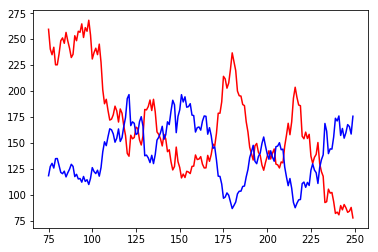

In [2]:
start = 75
stop = 250             # len(data) = 253
counter = []
uclose = []
uopen = []
dclose = []
dopen = []

for i in range(start, stop):
    counter.append(i)
    uclose.append(u_close[i])
    uopen.append(u_open[i])
    dclose.append(d_close[i])
    dopen.append(d_open[i])

plt.plot(counter, uclose, c='r')
plt.plot(counter, dclose, c='b')

print("r:\t"+str(np.corrcoef(uclose, dclose)[0][1]))
print("r^2:\t"+str(np.corrcoef(uclose, dclose)[0][1]**2))

r:	-0.9981144637471723
r^2:	0.9962324827413053


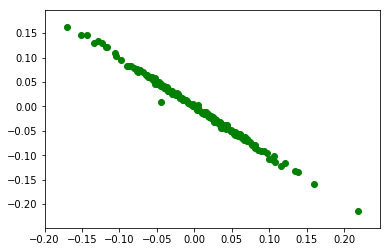

In [3]:
def pctChange(initial, final):
    change = (final - initial)
    return (change/initial)

def convertToPct(arr):
    final = []
    for i in range(1, len(arr)):
        final.append(pctChange(arr[i-1], arr[i]))
    return final

def convertIntraToPct(openVals, closeVals):
    final = []
    for i in range(0, len(openVals)):
        final.append(pctChange(openVals[i], closeVals[i]))
    return final

uclosepct = convertToPct(uclose)
uopenpct = convertToPct(uopen)
dclosepct = convertToPct(dclose)
dopenpct = convertToPct(dopen)
pctCounter = counter.copy()
pctCounter.pop(len(counter)-1)

plt.scatter(dclosepct, uclosepct, c='g')

print("r:\t"+str(np.corrcoef(uclosepct, dclosepct)[0][1]))
print("r^2:\t"+str(np.corrcoef(uclosepct, dclosepct)[0][1]**2))

U predicting D (blue)
	r:	-0.07061368852197493
	r^2:	0.004986293006678494
D predicting U (red)
	r:	-0.08960074452593503
	r^2:	0.008028293419601876


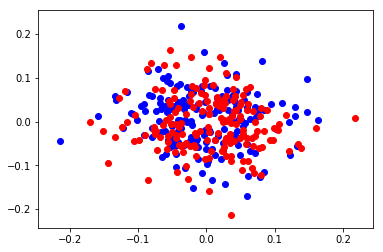

In [4]:
# "A" is used for the previous day or the predictor
# "B" is used for the next day or the prediction

counterA = pctCounter.copy()
counterA.pop(len(pctCounter)-1)
counterB = pctCounter.copy()
counterB.pop(0)

uclosepctA = uclosepct.copy()
uclosepctA.pop(len(pctCounter)-1)
uclosepctB = uclosepct.copy()
uclosepctB.pop(0)
uopenpctA = uopenpct.copy()
uopenpctA.pop(len(pctCounter)-1)
uopenpctB = uopenpct.copy()
uopenpctB.pop(0)
dclosepctA = dclosepct.copy()
dclosepctA.pop(len(pctCounter)-1)
dclosepctB = dclosepct.copy()
dclosepctB.pop(0)
dopenpctA = dopenpct.copy()
dopenpctA.pop(len(pctCounter)-1)
dopenpctB = dopenpct.copy()
dopenpctB.pop(0)

#between the days (previous days close predicting next days close) - interday

plt.scatter(uclosepctA, dclosepctB, c='b')
plt.scatter(dclosepctA, uclosepctB, c='r')

print("U predicting D (blue)")
print("\tr:\t"+str(np.corrcoef(uclosepctA, dclosepctB)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(uclosepctA, dclosepctB)[0][1]**2))
print("D predicting U (red)")
print("\tr:\t"+str(np.corrcoef(dclosepctA, uclosepctB)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(dclosepctA, uclosepctB)[0][1]**2))

U predicting D (blue)
	r:	-0.614460157168867
	r^2:	0.3775612847479888
D predicting U (red)
	r:	-0.6112697973535485
	r^2:	0.3736507651566482


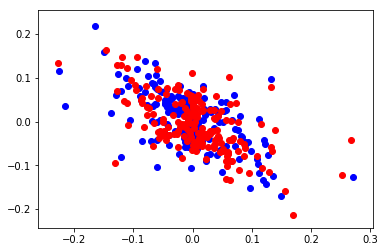

In [5]:
# within the day (open predicting close) - intraday
# interday pct change for open and close

plt.scatter(uopenpct, dclosepct, c='b')
plt.scatter(dopenpct, uclosepct, c='r')

print("U predicting D (blue)")
print("\tr:\t"+str(np.corrcoef(uopenpct, dclosepct)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(uopenpct, dclosepct)[0][1]**2))
print("D predicting U (red)")
print("\tr:\t"+str(np.corrcoef(dopenpct, uclosepct)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(dopenpct, uclosepct)[0][1]**2))

U predicting D (blue)
	r:	0.03162715396417806
	r^2:	0.001000276867873824
D predicting U (red)
	r:	0.03659008918000451
	r^2:	0.0013388346262006832


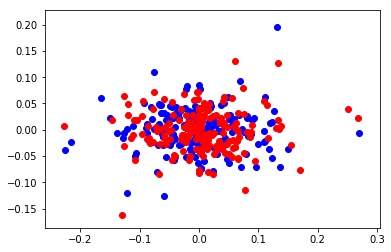

In [6]:
# within the day (open predicting close)
# intraday pct change for open and close

uintrapct = convertIntraToPct(uopen, uclose)
uintrapct.pop(0)
dintrapct = convertIntraToPct(dopen, dclose)
dintrapct.pop(0)

plt.scatter(uopenpct, dintrapct, c='b')
plt.scatter(dopenpct, uintrapct, c='r')

print("U predicting D (blue)")
print("\tr:\t"+str(np.corrcoef(uopenpct, dintrapct)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(uopenpct, dintrapct)[0][1]**2))
print("D predicting U (red)")
print("\tr:\t"+str(np.corrcoef(dopenpct, uintrapct)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(dopenpct, uintrapct)[0][1]**2))

U predicting D (blue)
	r:	-0.4629084557131023
	r^2:	0.2142842383706892
D predicting U (red)
	r:	-0.45840582051652456
	r^2:	0.21013589628342813


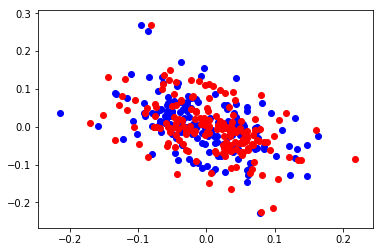

In [7]:
#between the days (previous days close predicting next days open) - interday

plt.scatter(uclosepctA, dopenpctB, c='b')
plt.scatter(dclosepctA, uopenpctB, c='r')

print("U predicting D (blue)")
print("\tr:\t"+str(np.corrcoef(uclosepctA, dopenpctB)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(uclosepctA, dopenpctB)[0][1]**2))
print("D predicting U (red)")
print("\tr:\t"+str(np.corrcoef(dclosepctA, uopenpctB)[0][1]))
print("\tr^2:\t"+str(np.corrcoef(dclosepctA, uopenpctB)[0][1]**2))

In [8]:
#
# buying strategies
#

# boolean buy signal, long only

